In [2]:
### NMF/topic model example (20 newsgroups data set)

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF
import numpy as np
import matplotlib.pyplot as plt
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

In [11]:
#reading data
dataset = fetch_20newsgroups(shuffle=True, random_state=1,remove=('headers', 'footers', 'quotes'))
dataset.data[99]

"For Sale:  1990 Pontiac Grand Prix SE\n\nWhite, White rims, Gray interior.\n58K miles (mostly highway),\n3.8 Litre V6 multi-port fuel-injected engine,\n5 speed manual transmission.\n\nOptions include:\n\nA/C,\nRear defogger,\nPower steering,\nPower brakes,\nPower windows,\nPower locks,\nPower mirrors,\nCruise control,\nPower glass moonroof with sunshade,\nPower seat/recliner (driver's),\nPower seat/comfort/lumbar/headrest (both),\nAM/FM cassette stero,\nElectronic monitor/service system\nwith graphic compass,\nStereo controls duplicated on\nsteering wheel,\nRemote-keyless entry,\nand others.\n\nAsking $11,500.\n\nThe car looks and rides like it just rolled off\nof the dealers lot.  It has been garaged and pampered.\nIt gets an average of 27.5 mpg highway, sometimes better;\ncity is around 19-23 mpg, depending on how it is driven.\n\nSelling because of baby coming soon.  Need 4-door family\ncar.  Will consider trade or partial trade with Ford Taurus,\nMercury Sable, or 4-door Pontiac G

In [3]:
# count how many newsgroups articles from each group
target=dataset.target
unique, counts = np.unique(target, return_counts=True)
with np.printoptions(threshold=np.inf):
    print(np.asarray((unique, counts)).T)


data_samples = dataset.data 
len(data_samples)


n_features = 1000  #maximum features (top 1000 words across the corpus)
n_components = 20  #number of topics to find

[[  0 480]
 [  1 584]
 [  2 591]
 [  3 590]
 [  4 578]
 [  5 593]
 [  6 585]
 [  7 594]
 [  8 598]
 [  9 597]
 [ 10 600]
 [ 11 595]
 [ 12 591]
 [ 13 594]
 [ 14 593]
 [ 15 599]
 [ 16 546]
 [ 17 564]
 [ 18 465]
 [ 19 377]]


In [12]:
#tfidf tranformation

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english',
                                   token_pattern=u'(?u)\\b\\w*[a-z]\\w+\\b'   #get rid of numbers
                                   )
tfidf = tfidf_vectorizer.fit_transform(data_samples)



tfidf.shape



#NMF model (should be run with multiple random initializtions)
nmf = NMF(n_components=n_components, random_state=1).fit(tfidf)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


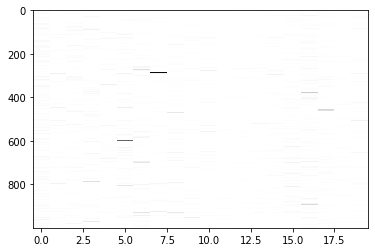

In [15]:
feature_names = tfidf_vectorizer.get_feature_names()
topics = nmf.components_
topics.shape
plt.imshow(topics.T, cmap='Greys', interpolation='nearest', aspect = 'auto')
#plt.show()
#plt.axes().set_aspect('equal')

In [16]:
# print top words for each topic

def print_top_words(topics, feature_names, n_top_words):
    for topic_idx, topic in enumerate(topics):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
        print(" ")
    print()


print("NMF results")
print_top_words(topics,feature_names,10)

NMF results
Topic #0: people government right gun armenian armenians law said rights guns
 
Topic #1: thanks mail advance looking hi info help information address appreciated
 
Topic #2: god jesus bible believe christ faith christian christians church sin
 
Topic #3: game team year games season players play hockey win league
 
Topic #4: drive scsi hard drives disk ide floppy controller cd mac
 
Topic #5: new sale price offer condition shipping asking interested used sell
 
Topic #6: windows file files dos use window program using problem version
 
Topic #7: edu soon university cs ftp email article internet pub david
 
Topic #8: key chip encryption clipper keys use government escrow public algorithm
 
Topic #9: don know want let need sure sorry tell believe things
 
Topic #10: card video monitor cards drivers bus vga driver color memory
 
Topic #11: just thought tell mean wanted ll fine work oh little
 
Topic #12: does know anybody mean doesn say work help program exist
 
Topic #13: lik

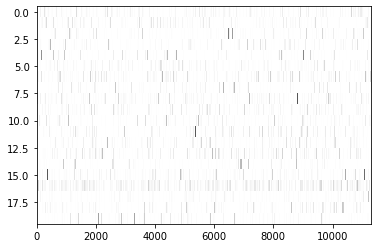

In [17]:
# coefficients in the space spanned by the topics (for subsequent clustering etc)

coefs = nmf.transform(tfidf)
plt.imshow(coefs.T, cmap='Greys', interpolation='nearest', aspect = 'auto')